#### Bibliotecas

In [1]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import enum

from classes.helper.utils import Utils

#### Caminhos dos arquivos

**10 dimensões**

In [2]:
### PSO ###
pso_f1_10d_path = "./results/f_pso_10d_1309_1956/pso/f1"
pso_f2_10d_path = "./results/f_pso_10d_1309_1956/pso/f2"
pso_f4_10d_path = "./results/f_pso_10d_1309_1956/pso/f4"
pso_f6_10d_path = "./results/f_pso_10d_1309_1956/pso/f6"
pso_f7_10d_path = "./results/f_pso_10d_1309_2027/pso/f7"
pso_f9_10d_path = "./results/f_pso_10d_1309_2027/pso/f9"
pso_f14_10d_path = "./results/f_pso_10d_1309_2027/pso/f14"

path_pso_10d = [
    pso_f1_10d_path,
    pso_f2_10d_path,
    pso_f4_10d_path,
    pso_f6_10d_path,
    pso_f7_10d_path,
    pso_f9_10d_path,
    pso_f14_10d_path
]

### PSOR ###
psor_f1_10d_path = "./results/f_psor_10d_1309_2317/psor/f1"
psor_f2_10d_path = "./results/f_psor_10d_1309_2317/psor/f2"
psor_f4_10d_path = "./results/f_psor_10d_1309_2317/psor/f4"
psor_f6_10d_path = "./results/f_psor_10d_1309_2317/psor/f6"
psor_f7_10d_path = "./results/f_psor_10d_1309_2359/psor/f7"
psor_f9_10d_path = "./results/f_psor_10d_1309_2359/psor/f9"
psor_f14_10d_path = "./results/f_psor_10d_1309_2359/psor/f14"

path_psor_10d = [
    psor_f1_10d_path,
    psor_f2_10d_path,
    psor_f4_10d_path,
    psor_f6_10d_path,
    psor_f7_10d_path,
    psor_f9_10d_path,
    psor_f14_10d_path
]

**30 dimensões**

In [3]:
### PSO ###
pso_f1_30d_path = "./results/f_pso_30d_1409_2153/pso/f1"
pso_f2_30d_path = "./results/f_pso_30d_1409_2153/pso/f2"
pso_f4_30d_path = "./results/f_pso_30d_1409_2153/pso/f4"
pso_f6_30d_path = "./results/f_pso_30d_1409_2153/pso/f6"
pso_f7_30d_path = "./results/f_pso_30d_1409_2245/pso/f7"
pso_f9_30d_path = "./results/f_pso_30d_1409_2245/pso/f9"
pso_f14_30d_path = "./results/f_pso_30d_1409_2245/pso/f14"

path_pso_30d = [
    pso_f1_30d_path,
    pso_f2_30d_path,
    pso_f4_30d_path,
    pso_f6_30d_path,
    pso_f7_30d_path,
    pso_f9_30d_path,
    pso_f14_30d_path
]

### PSOR ###
psor_f1_30d_path = "./results/f_psor_30d_1409_2310/psor/f1"
psor_f2_30d_path = "./results/f_psor_30d_1409_2310/psor/f2"
psor_f4_30d_path = "./results/f_psor_30d_1409_2310/psor/f4"
psor_f6_30d_path = "./results/f_psor_30d_1409_2310/psor/f6"
psor_f7_30d_path = "./results/f_psor_30d_1509_0028/psor/f7"
psor_f9_30d_path = "./results/f_psor_30d_1509_0028/psor/f9"
psor_f14_30d_path = "./results/f_psor_30d_1509_0028/psor/f14"

path_psor_30d = [
    psor_f1_30d_path,
    psor_f2_30d_path,
    psor_f4_30d_path,
    psor_f6_30d_path,
    psor_f7_30d_path,
    psor_f9_30d_path,
    psor_f14_30d_path
]

#### Métodos auxiliares

In [4]:
class TiposObjetivos(enum.Enum):
    BEST_AVG = 'best_fitness'
    DISTANCE = 'dist_particles'

class TiposAlgoritmos(enum.Enum):
    PSO = 'pso'
    PSOR = 'psor'

In [5]:
def criar_visualizacoes(funcpath_pso: str, 
                        funcpath_psor: str, 
                        objetivo: TiposObjetivos, 
                        best_exec_pso: int, best_exec_psor: int,
                        use_legend: bool = True,
                        figname: str = 'plot') -> pd.DataFrame:
    
    ### 1. Cria dataframes ###
    df_1 = criar_dataframe(funcpath_pso, objetivo, TiposAlgoritmos.PSO)
    df_2 = criar_dataframe(funcpath_psor, objetivo, TiposAlgoritmos.PSOR)

    ### 2. Calcula médias ###
    df_1['average'] = df_1.mean(axis=1)
    df_2['average'] = df_2.mean(axis=1)
    ### 3. Normaliza o eixo x para o PSO ###
    pso_best_ajustado = df_1[f'exec_{best_exec_pso}'][::2]
    pso_avg_ajustado = df_1['average'][::2]
    ### 4. Ajusta os xlabels ###
    xticks_ajustado = [v * 500 for v in range(df_2.shape[0])]

    ### 5. Plot ###
    plt.figure(figsize=(5, 2.4))
    plt.plot(xticks_ajustado, pso_best_ajustado, color = 'black', linestyle = "-", label = 'pso_best')
    plt.plot(xticks_ajustado, pso_avg_ajustado, color = 'black', linestyle = "--", label = 'pso_avg')

    plt.plot(xticks_ajustado, df_2[f'exec_{best_exec_psor}'], color = 'green', linestyle = ":", label = 'psor_best')
    plt.plot(xticks_ajustado, df_2['average'], color = 'green', linestyle = "-.", label = 'psor_avg')

    if use_legend:
        # plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fontsize = 7.8, frameon=False)

    # plt.xlabel("Gerações")
    # plt.ylabel("F(x)")
    plt.yscale("log")
    
    plt.tight_layout()
    plt.savefig(f"./plots/{figname}.jpg", dpi = 300)

def criar_dataframe(path, objetivo, algoritmo: TiposAlgoritmos):
    lista_ = []  
    dict_ = {}

    for i in range(0, 30):
        res = Utils.open_list_from_txt(path = path, name = f"{objetivo.value}_{i}")
        dict_[f'exec_{i}'] = res
    lista_.append(dict_)

    tamanho_esperado = 21 if algoritmo.value == TiposAlgoritmos.PSO.value else 11
    lista_ = ajusta_tamanho_registros(lista_, tamanho_esperado)
    dfs = []
    for dado in lista_:
        df_temp = pd.DataFrame(dado)
        dfs.append(df_temp)
            
    return pd.concat(dfs, axis=1)

def ajusta_tamanho_registros(lista_de_dics, tamanho_esperado):
    n_lista_ = []
    for key, values in lista_de_dics[0].items():
        dic = {}
        if len(values) < tamanho_esperado:
            ultimo_valor_valido = values[-1]
            while len(values) < tamanho_esperado:
                values.append(ultimo_valor_valido)
        dic[key] = values
        n_lista_.append(dic)

    return n_lista_

#### Gerando visualizações das funções

In [6]:
plot_com_legenda = True

**10 dimensões**

In [7]:
best_execs_pso = [17, 23, 12, 12, 17, 23, 25]
best_execs_psor = [13, 26, 2, 8, 25, 2, 0]

**F1**

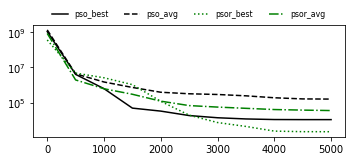

In [8]:
idx = 0
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f1_10d')

**F2**

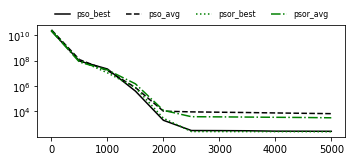

In [9]:
idx = 1
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f2_10d')

**F4**

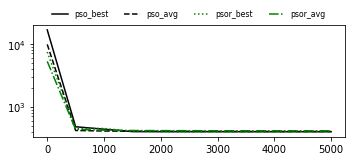

In [10]:
idx = 2
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f4_10d')

**F6**

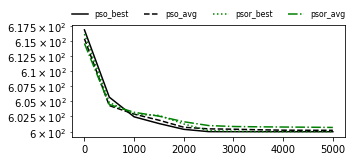

In [11]:
idx = 3
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f6_10d')

**F7**

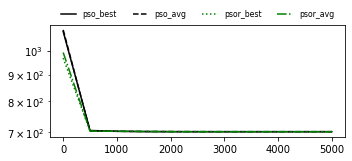

In [12]:
idx = 4
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f7_10d')

**F9**

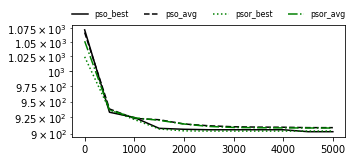

In [13]:
idx = 5
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f9_10d')

**F14**

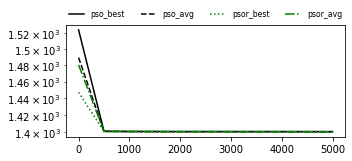

In [14]:
idx = 6
criar_visualizacoes(funcpath_pso = path_pso_10d[idx], 
                    funcpath_psor = path_psor_10d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso[idx],
                    best_exec_psor = best_execs_psor[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f14_10d')

**30 dimensões**

In [15]:
best_execs_pso_30 = [26, 1, 28, 13, 26, 23, 20]
best_execs_psor_30 = [24, 0, 1, 16, 11, 17, 5]

**F1**

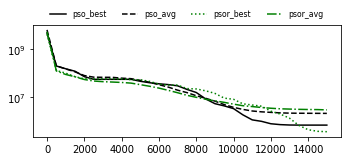

In [16]:
idx = 0
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f1_30d')

**F2**

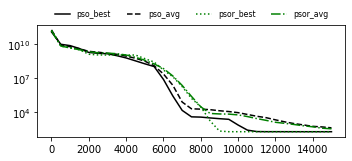

In [17]:
idx = 1
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f2_30d')

**F4**

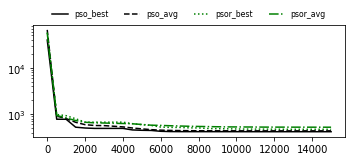

In [18]:
idx = 2
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f4_30d')

**F6**

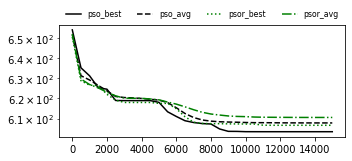

In [19]:
idx = 3
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f6_30d')

**F7**

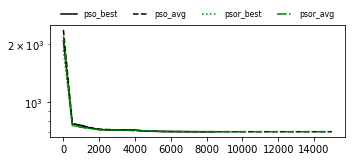

In [20]:
idx = 4
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f7_30d')

**F9**

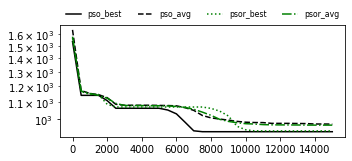

In [21]:
idx = 5
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f9_30d')

**F14**

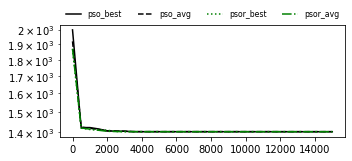

In [22]:
idx = 6
criar_visualizacoes(funcpath_pso = path_pso_30d[idx], 
                    funcpath_psor = path_psor_30d[idx], 
                    objetivo = TiposObjetivos.BEST_AVG, 
                    best_exec_pso = best_execs_pso_30[idx],
                    best_exec_psor = best_execs_psor_30[idx],
                    use_legend = plot_com_legenda,
                    figname = 'f14_30d')